# Chapter 8: Continuous Random Variables

## Definition and Contrast with Discrete Variables

In the previous chapters, we focused on *discrete* random variables, which take on a finite or countably infinite number of distinct values. Think about the number of heads in 10 coin flips (0, 1, ..., 10), the number of emails received in an hour (0, 1, 2, ...), or the outcome of a die roll ({1, 2, 3, 4, 5, 6}).

Now, we turn our attention to *continuous* random variables. These variables can take on any value within a given range or interval. Examples include:

* The exact height of a randomly selected adult (e.g., 1.7532... meters).
* The time until a radioactive particle decays (e.g., 3.1415... seconds).
* The temperature of a room (e.g., 21.5... degrees Celsius).
* The exact concentration of a chemical in a solution.

The key difference lies in the nature of the sample space. For discrete variables, we can list the possible outcomes. For continuous variables, there are uncountably infinite possible values between any two given values.

**Example:** Measuring the exact height of a person results in a continuous variable, as height can theoretically take any value within a range (e.g., 1.5m, 1.51m, 1.511m, ...). In contrast, counting the number of people taller than 1.8m in a sample of 100 yields a discrete variable (0, 1, 2, ..., 100).

This fundamental difference means we can no longer talk about the probability of the variable taking on a *specific* value, like $P(\text{Height} = 1.80000... \text{ meters})$. Because there are infinitely many possible heights, the probability of hitting any single exact value is essentially zero. Instead, for continuous variables, we talk about the probability that the variable falls *within a certain interval*, such as $P(1.7\text{m} < \text{Height} \le 1.8\text{m})$.

To describe the probability distribution of continuous random variables, we introduce two key functions: the Probability Density Function (PDF) and the Cumulative Distribution Function (CDF).

## Probability Density Function (PDF)

For a continuous random variable $X$, the **Probability Density Function (PDF)**, denoted as $f_X(x)$, describes the *relative likelihood* for the random variable to take on a given value. Unlike the PMF for discrete variables, the PDF value $f_X(x)$ is *not* a probability itself. Instead, the *area under the PDF curve* over an interval corresponds to the probability that the variable falls within that interval.

Key properties of a PDF $f_X(x)$:
1.  Non-negativity: $f_X(x) \ge 0$ for all $x$.
2.  Total area equals 1: $\int_{-\infty}^{\infty} f_X(x) dx = 1$. (The total probability over the entire range of possible values is 1).
3.  Probability as Area: The probability that $X$ falls within an interval $[a, b]$ is given by the integral of the PDF over that interval:
    $$P(a \le X \le b) = \int_a^b f_X(x) dx$$

**Important Note:** For any continuous random variable $X$ and any specific value $c$, $P(X=c) = \int_c^c f_X(x) dx = 0$. This implies $P(a \le X \le b) = P(a < X \le b) = P(a \le X < b) = P(a < X < b)$. Including or excluding the endpoints does not change the probability for continuous variables.

**Example:** Imagine the distribution of IQ scores in a large population, often modeled by a Normal distribution (a "bell curve"). The PDF would be highest around the average IQ (e.g., 100) and taper off towards very high or very low scores. The value of the PDF at $x=110$ tells us the density of the distribution around that point, but the probability $P(\text{IQ}=110)$ is 0. However, we can calculate the probability $P(100 \le \text{IQ} \le 110)$ by finding the area under the bell curve between 100 and 110.

In Python, libraries like `scipy.stats` provide objects representing various continuous distributions, allowing us to evaluate their PDFs using the `.pdf()` method.

## Cumulative Distribution Function (CDF)

The **Cumulative Distribution Function (CDF)**, denoted as $F_X(x)$, gives the probability that the random variable $X$ takes on a value less than or equal to a specific value $x$.

$$F_X(x) = P(X \le x)$$

For a continuous random variable with PDF $f_X(t)$, the CDF is obtained by integrating the PDF from negative infinity up to $x$:

$$F_X(x) = \int_{-\infty}^{x} f_X(t) dt$$

Key properties of a CDF $F_X(x)$:
1.  $F_X(x)$ is a non-decreasing function of $x$.
2.  $\lim_{x \to -\infty} F_X(x) = 0$. (The probability of being less than or equal to a very small number is 0).
3.  $\lim_{x \to \infty} F_X(x) = 1$. (The probability of being less than or equal to a very large number is 1).
4.  The probability of $X$ falling in an interval $(a, b]$ can be calculated using the CDF:
    $$P(a < X \le b) = F_X(b) - F_X(a)$$
5.  The PDF can be obtained by differentiating the CDF (where the derivative exists): $f_X(x) = \frac{d}{dx} F_X(x)$.

**Example:** For the IQ distribution, the CDF $F_X(110)$ would give the probability that a randomly selected person has an IQ score less than or equal to 110. This corresponds to the total area under the PDF curve to the left of $x=110$.

`scipy.stats` objects also provide methods to evaluate the CDF using the `.cdf()` method.

## Expected Value and Variance

Similar to discrete random variables, we can define measures of central tendency and spread for continuous variables using integration instead of summation.

**Expected Value (Mean):**
The expected value or mean of a continuous random variable $X$, denoted $E[X]$ or $\mu$, represents the average value we would expect to observe over many repetitions of the experiment. It's calculated by integrating the product of each possible value $x$ and its corresponding density $f_X(x)$ over the entire range:

$$E[X] = \mu = \int_{-\infty}^{\infty} x f_X(x) dx$$

Think of it as the center of mass of the distribution.

**Variance and Standard Deviation:**
The variance measures the spread or dispersion of the distribution around the mean. It's the expected value of the squared deviation from the mean:

$$Var(X) = \sigma^2 = E[(X - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 f_X(x) dx$$

An alternative computational formula is often more convenient:
$$Var(X) = E[X^2] - (E[X])^2$$
where $E[X^2] = \int_{-\infty}^{\infty} x^2 f_X(x) dx$ is the second moment about the origin.

The **Standard Deviation**, $\sigma = \sqrt{Var(X)}$, provides a measure of spread in the original units of the random variable.

**Example:** For the IQ distribution (often modeled as Normal with mean 100 and standard deviation 15), $E[\text{IQ}] = 100$ and $Var(\text{IQ}) = 15^2 = 225$. The standard deviation $\sigma = 15$ indicates the typical deviation of IQ scores from the average of 100.

`scipy.stats` distributions often have methods like `.mean()`, `.var()`, and `.std()` to compute these directly, or `.expect()` for more general expectations.

## Percentiles and Quantiles

Percentiles and quantiles help us understand specific points in the distribution relative to the cumulative probability.

The **$p$-th percentile** (where $0 < p < 1$) is the value $x_p$ such that the probability of the random variable being less than or equal to $x_p$ is $p$. In terms of the CDF:

$$F_X(x_p) = P(X \le x_p) = p$$

The **quantile function**, often denoted $Q(p)$, is the inverse of the CDF: $Q(p) = F_X^{-1}(p) = x_p$. It tells you the value below which a certain proportion $p$ of the distribution lies.

* The 0.5 quantile (or 50th percentile) is the **median**.
* The 0.25 quantile (25th percentile) is the first quartile (Q1).
* The 0.75 quantile (75th percentile) is the third quartile (Q3).

**Example:** Finding the IQ score that marks the 95th percentile means finding the value $x_{0.95}$ such that $P(\text{IQ} \le x_{0.95}) = 0.95$. For a Normal distribution with mean 100 and standard deviation 15, this value is approximately 124.7. This means 95% of the population has an IQ score of 124.7 or less.

`scipy.stats` provides the `.ppf()` (percent point function) method, which is the inverse of the CDF (quantile function).

## Functions of a Continuous Random Variable

Often, we are interested in a new random variable $Y$ that is a function of an existing continuous random variable $X$. That is, $Y = g(X)$. How can we find the PDF or CDF of $Y$?

**Method 1: Using the CDF**
1.  Find the CDF of $Y$: $F_Y(y) = P(Y \le y) = P(g(X) \le y)$.
2.  Express the event $\{g(X) \le y\}$ in terms of $X$. This might involve solving the inequality for $X$. Be careful if $g(x)$ is not monotonically increasing (i.e., if it goes up and down).
3.  Calculate $P(\text{event in terms of } X)$ using the CDF of $X$, $F_X(x)$.
4.  Differentiate the resulting $F_Y(y)$ with respect to $y$ to find the PDF of $Y$: $f_Y(y) = \frac{d}{dy} F_Y(y)$.

**Method 2: Change of Variables Formula (for monotonic functions)**
If $y = g(x)$ is a strictly monotonic (always increasing or always decreasing) differentiable function over the range of $X$, then it has an inverse function $x = g^{-1}(y)$. The PDF of $Y$ is given by:

$$f_Y(y) = f_X(g^{-1}(y)) \left| \frac{dx}{dy} \right|$$
where $\frac{dx}{dy}$ is the derivative of the inverse function $x = g^{-1}(y)$ with respect to $y$. The absolute value ensures the PDF remains non-negative.

**Example:** Suppose the temperature $T$ in Celsius is a random variable, perhaps uniformly distributed between 15°C and 25°C. We want to find the distribution of the temperature in Fahrenheit, $F = 1.8T + 32$.
Here, $g(T) = 1.8T + 32$. This is strictly increasing.
The inverse function is $T = g^{-1}(F) = (F - 32) / 1.8$.
The derivative is $\frac{dT}{dF} = 1 / 1.8$.
If the PDF of T is $f_T(t) = \frac{1}{25-15} = 0.1$ for $15 \le t \le 25$ (and 0 otherwise), then the PDF of $F$ is:
$$f_F(f) = f_T\left(\frac{f - 32}{1.8}\right) \left| \frac{1}{1.8} \right|$$
We need to find the range for F. When $T=15$, $F = 1.8(15) + 32 = 59$. When $T=25$, $F = 1.8(25) + 32 = 77$.
So, for $59 \le f \le 77$:
$$f_F(f) = (0.1) \times \left| \frac{1}{1.8} \right| = \frac{0.1}{1.8} = \frac{1}{18}$$
Thus, F is uniformly distributed between 59°F and 77°F.

Calculating the expected value of a function $Y=g(X)$ can often be done more directly without finding the full distribution of Y, using the **Law of the Unconscious Statistician (LOTUS)**:
$$E[Y] = E[g(X)] = \int_{-\infty}^{\infty} g(x) f_X(x) dx$$

## Hands-on: Working with Continuous Variables in Python

Let's put these concepts into practice using Python libraries. We'll simulate heights assuming a Normal distribution and compare the histogram to the theoretical PDF, as well as perform calculations using `scipy.stats` and `scipy.integrate`.

In [1]:
# Essential imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
import seaborn as sns

# Configure plots for better visualization
sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Make plots sharper
plt.rcParams['figure.figsize'] = (10, 6)

### 1. Defining PDFs and CDFs with `scipy.stats`

`scipy.stats` provides convenient objects for many standard continuous distributions (we'll explore these in Chapter 9). Let's use the Normal distribution as an example again. Suppose adult male heights (in cm) are Normally distributed with a mean ($\mu$) of 177 cm and a standard deviation ($\sigma$) of 7 cm.

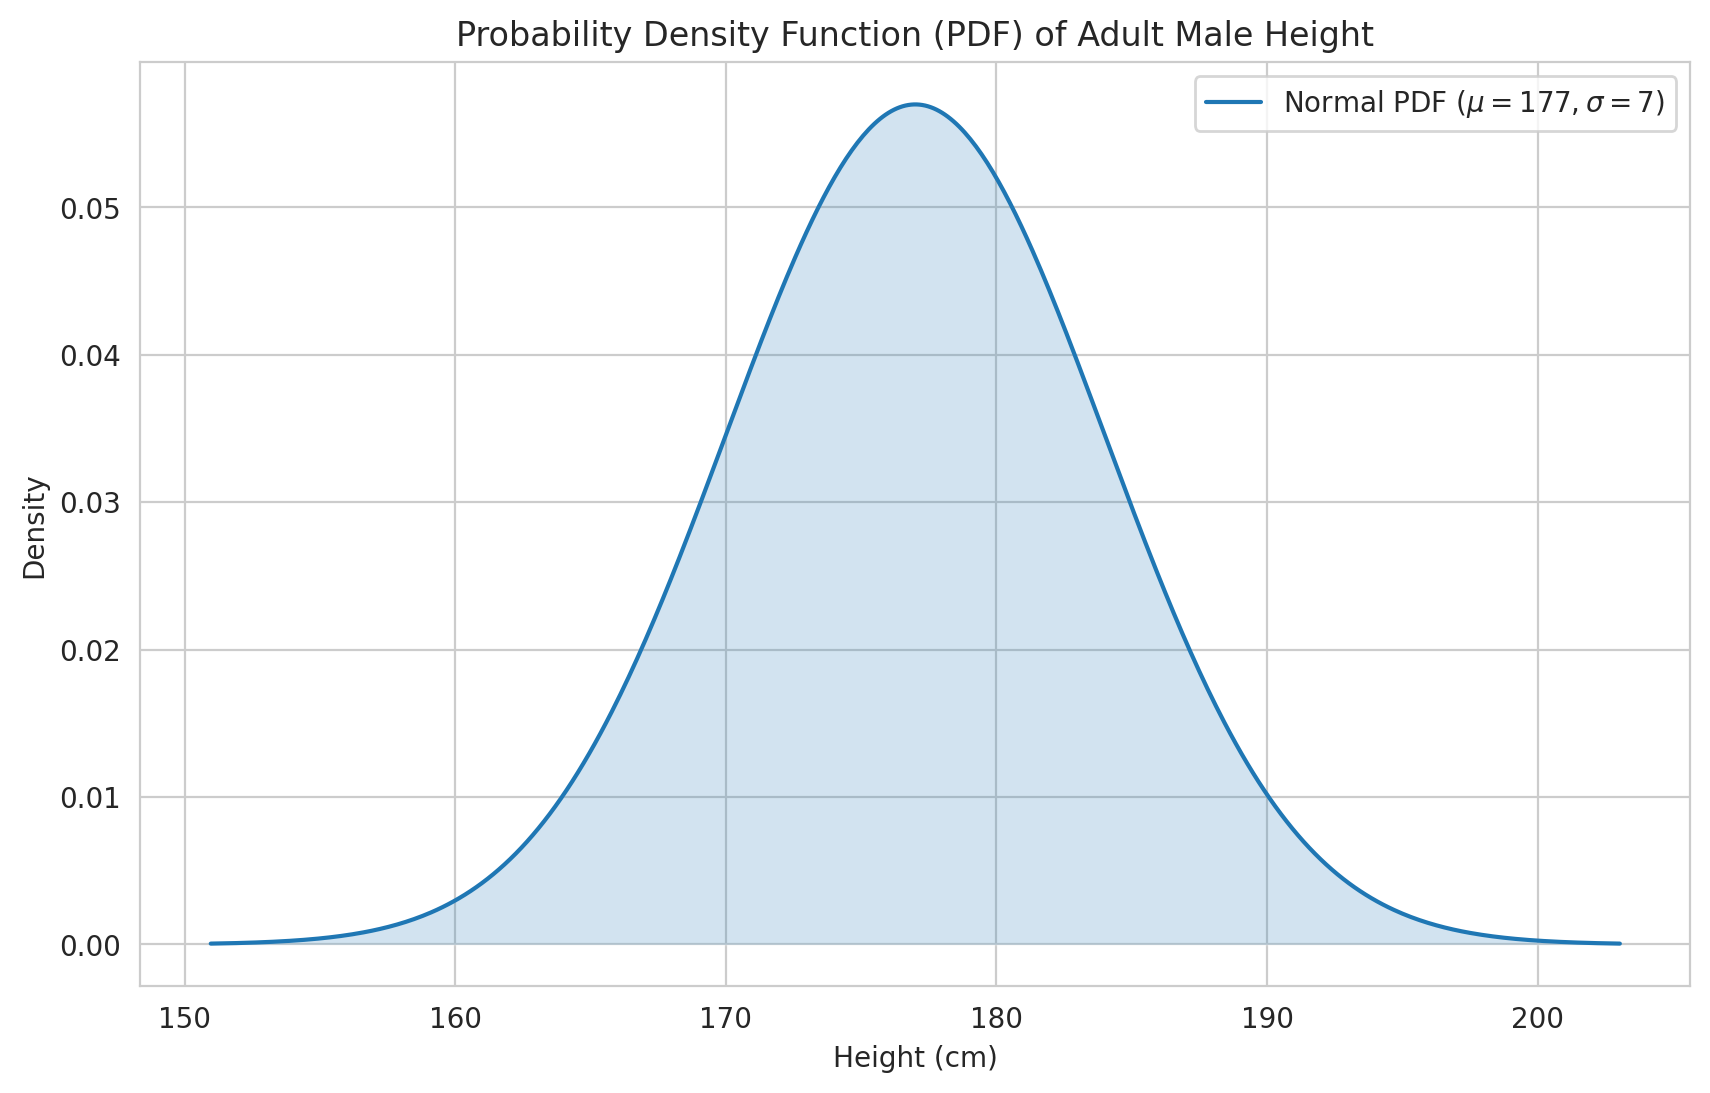

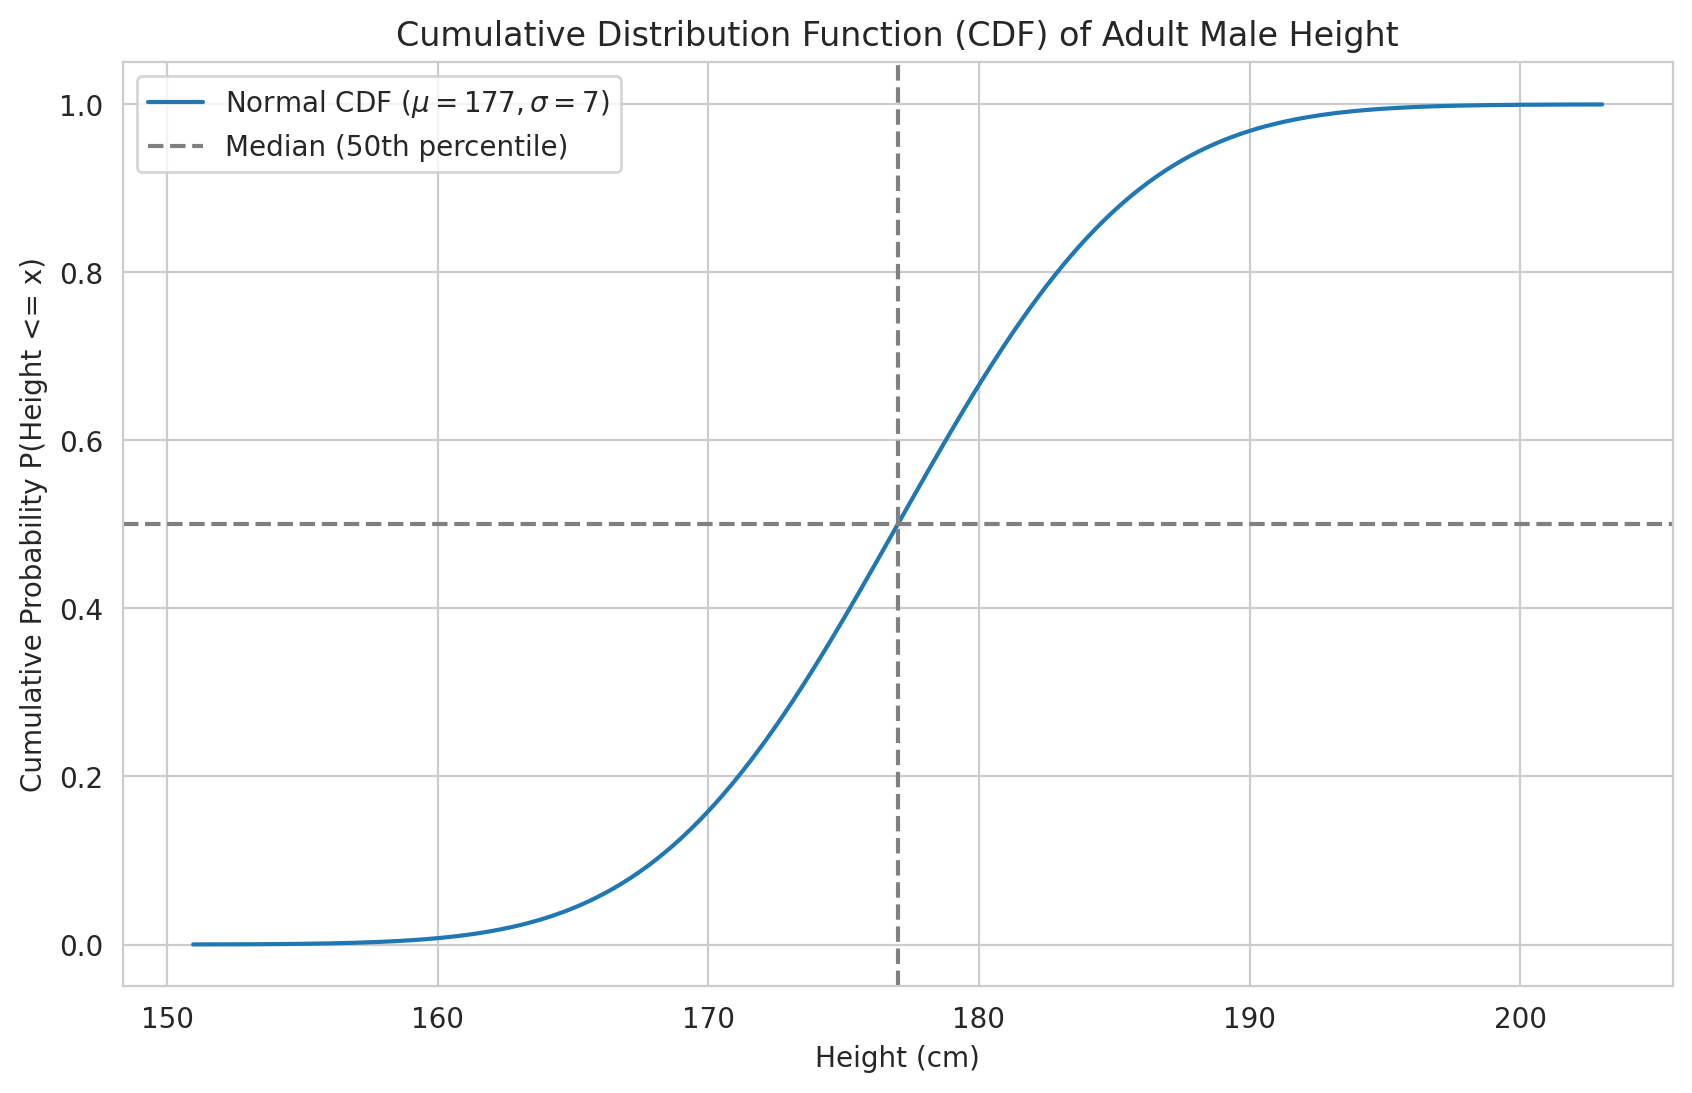

In [2]:
# Define the normal distribution for heights
mu_height = 177
sigma_height = 7
# Create a frozen distribution object
height_dist = stats.norm(loc=mu_height, scale=sigma_height) # loc=mean, scale=std dev

# Define a range of height values for plotting
# Go out +/- 4 standard deviations to cover most of the probability mass
x_height = np.linspace(height_dist.ppf(0.0001), height_dist.ppf(0.9999), 500)

# Calculate PDF and CDF values for the range
pdf_values = height_dist.pdf(x_height)
cdf_values = height_dist.cdf(x_height)

# Plot PDF
plt.figure()
plt.plot(x_height, pdf_values, label=f'Normal PDF ($\mu={mu_height}, \sigma={sigma_height}$)')
plt.fill_between(x_height, pdf_values, alpha=0.2)
plt.title('Probability Density Function (PDF) of Adult Male Height')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot CDF
plt.figure()
plt.plot(x_height, cdf_values, label=f'Normal CDF ($\mu={mu_height}, \sigma={sigma_height}$)')
plt.title('Cumulative Distribution Function (CDF) of Adult Male Height')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability P(Height <= x)')
# Add lines for key percentiles
plt.axhline(0.5, color='grey', linestyle='--', label='Median (50th percentile)')
plt.axvline(height_dist.ppf(0.5), color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

### 2. Calculating Probabilities using PDF and CDF

We want to calculate the probability of a height falling within a specific range, e.g., P(170 cm < Height ≤ 185 cm).

**Method 1: Using the CDF**
$P(170 < X \le 185) = F_X(185) - F_X(170)$

P(170 < Height <= 185) using CDF: 0.7148


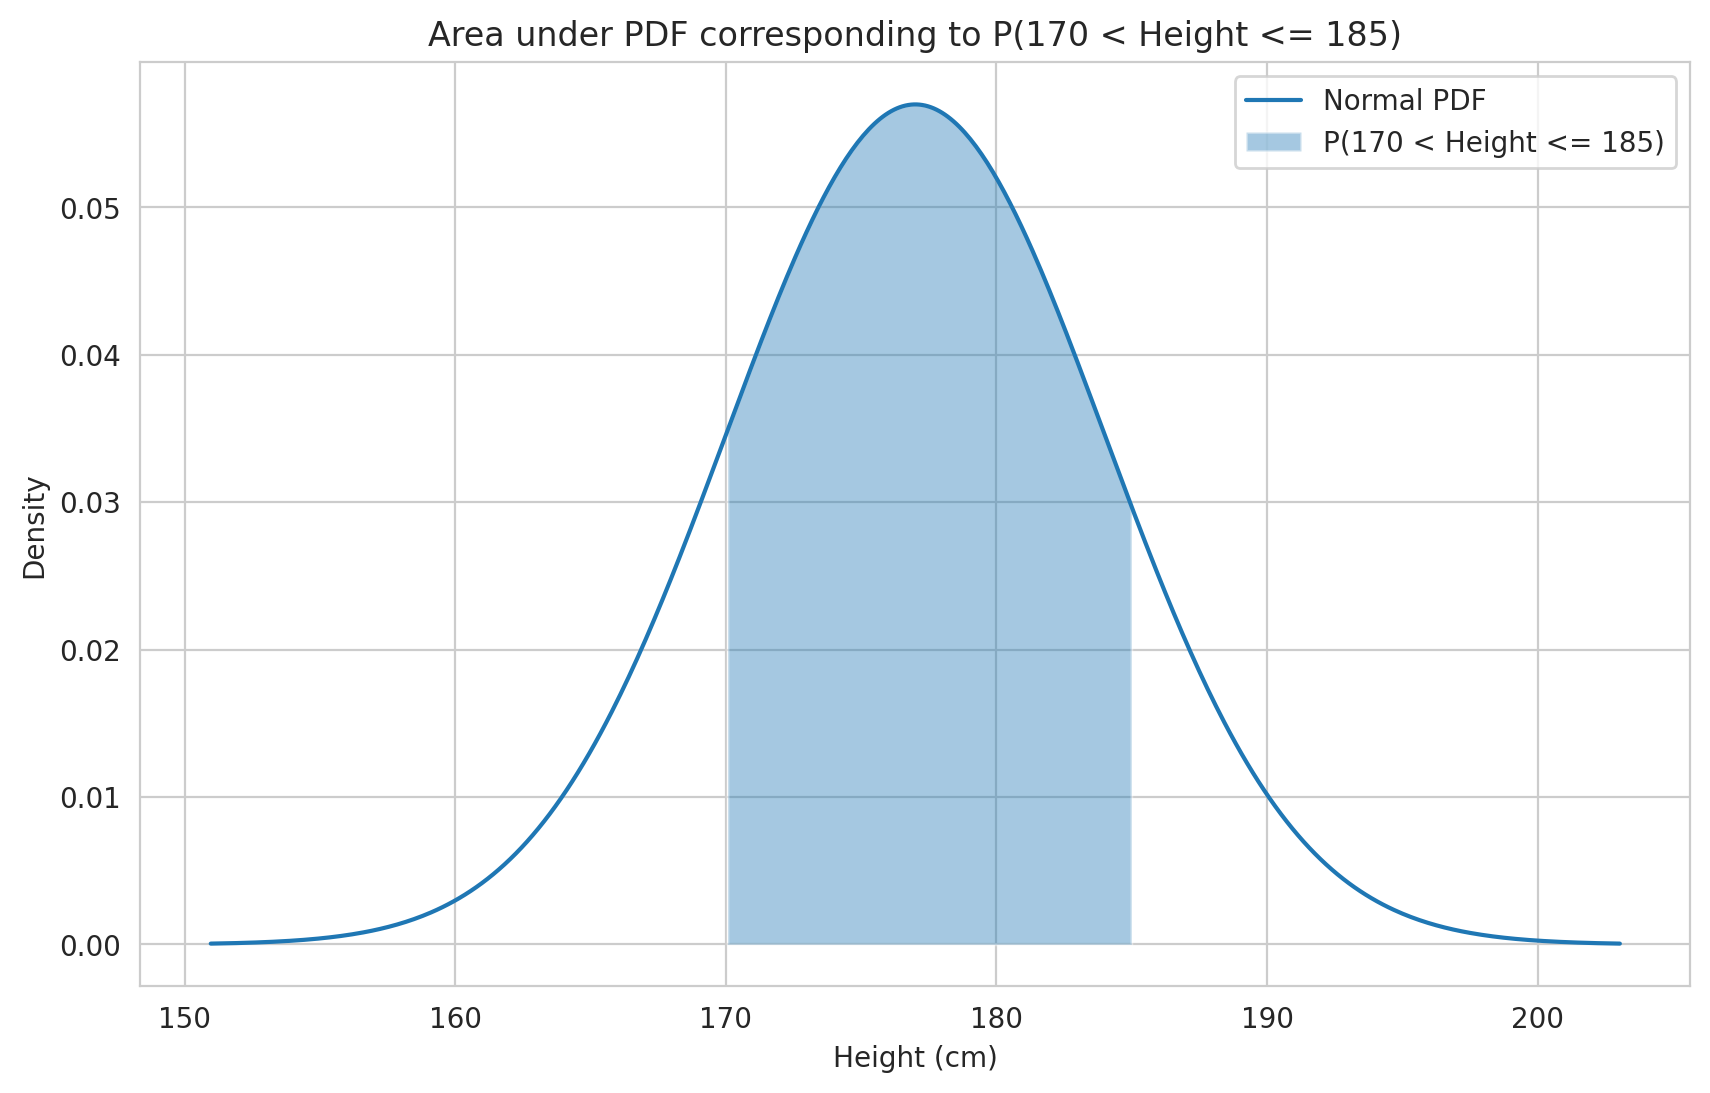

In [3]:
# Calculate probability using CDF method
prob_cdf = height_dist.cdf(185) - height_dist.cdf(170)
print(f"P(170 < Height <= 185) using CDF: {prob_cdf:.4f}")

# Visualize this area on the PDF
plt.figure()
plt.plot(x_height, pdf_values, label='Normal PDF')
# Create filter for the range of interest
range_filter = (x_height > 170) & (x_height <= 185)
plt.fill_between(x_height[range_filter], pdf_values[range_filter], alpha=0.4, label='P(170 < Height <= 185)')
plt.title('Area under PDF corresponding to P(170 < Height <= 185)')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Method 2: Using Numerical Integration of the PDF**
We need to calculate $\int_{170}^{185} f_X(x) dx$. We can use `scipy.integrate.quad` (which performs quadrature, a numerical integration method).

In [4]:
# The first argument to quad is the function to integrate (our PDF)
# The next two arguments are the lower and upper limits of integration
prob_integral, integration_error = integrate.quad(height_dist.pdf, 170, 185)

print(f"P(170 < Height <= 185) using PDF integration: {prob_integral:.4f}")
print(f"Estimated integration error: {integration_error:.2e}") # Should be very small

P(170 < Height <= 185) using PDF integration: 0.7148
Estimated integration error: 7.94e-15


As expected, both methods give essentially the same result (within numerical precision). Using the CDF is generally more direct and computationally efficient when available. Integration is necessary if you only have the PDF function defined (e.g., a custom, non-standard distribution).

### 3. Calculating Expected Value, Variance, and Percentiles

`scipy.stats` objects have built-in methods for these common statistics.

In [5]:
# Expected Value (Mean)
e_height = height_dist.mean()
print(f"Expected Height E[X]: {e_height:.2f} cm")

# Variance
var_height = height_dist.var()
print(f"Variance Var(X): {var_height:.2f} cm^2")

# Standard Deviation
std_height = height_dist.std()
print(f"Standard Deviation std(X): {std_height:.2f} cm") # Should match sigma_height

# Calculate Percentiles (Quantiles) using PPF (Percent Point Function)
percentile_95 = height_dist.ppf(0.95) # 95th percentile
median = height_dist.ppf(0.50)       # 50th percentile (median)
q1 = height_dist.ppf(0.25)           # 25th percentile (Q1)
q3 = height_dist.ppf(0.75)           # 75th percentile (Q3)

print(f"25th Percentile (Q1) of Height: {q1:.2f} cm")
print(f"Median Height (Q2): {median:.2f} cm") # Should be equal to the mean for Normal dist.
print(f"75th Percentile (Q3) of Height: {q3:.2f} cm")
print(f"95th Percentile of Height: {percentile_95:.2f} cm")

Expected Height E[X]: 177.00 cm
Variance Var(X): 49.00 cm^2
Standard Deviation std(X): 7.00 cm
25th Percentile (Q1) of Height: 172.28 cm
Median Height (Q2): 177.00 cm
75th Percentile (Q3) of Height: 181.72 cm
95th Percentile of Height: 188.51 cm


**Calculating Moments using Numerical Integration**

We can also calculate moments like $E[X]$ and $E[X^2]$ using `integrate.quad` and the definitions:
$E[X] = \int_{-\infty}^{\infty} x f_X(x) dx$
$E[X^2] = \int_{-\infty}^{\infty} x^2 f_X(x) dx$

We integrate over a wide practical range instead of $(-\infty, \infty)$, e.g., $\mu \pm 10\sigma$.

In [6]:
# Define functions representing x*f(x) and x^2*f(x)
def integrand_mean(x):
  """Function x * pdf(x) for calculating E[X]"""
  return x * height_dist.pdf(x)

def integrand_mean_square(x):
  """Function x^2 * pdf(x) for calculating E[X^2]"""
  return x**2 * height_dist.pdf(x)

# Integrate over a wide range (practically equivalent to -inf to +inf for Normal)
lower_bound = height_dist.ppf(1e-8) # Very small percentile
upper_bound = height_dist.ppf(1 - 1e-8) # Very large percentile

e_height_integral, _ = integrate.quad(integrand_mean, lower_bound, upper_bound)
e_height_sq_integral, _ = integrate.quad(integrand_mean_square, lower_bound, upper_bound)

# Calculate variance from integrated moments
var_height_integral = e_height_sq_integral - (e_height_integral)**2

print(f"E[X] via integration: {e_height_integral:.2f}")
print(f"E[X^2] via integration: {e_height_sq_integral:.2f}")
print(f"Var(X) via integration (E[X^2] - E[X]^2): {var_height_integral:.2f}")

E[X] via integration: 177.00
E[X^2] via integration: 31378.00
Var(X) via integration (E[X^2] - E[X]^2): 49.00


The results from numerical integration closely match the built-in methods, confirming our understanding of the definitions.

### 4. Simulating Data and Comparing Empirical vs. Theoretical

We can simulate drawing random samples from the distribution using the `.rvs()` method (Random VariateS) and compare the results (like the histogram and sample statistics) to the theoretical distribution. This is a fundamental technique in Monte Carlo methods (Chapter 17).

Theoretical Mean: 177.00, Empirical Mean (from 10000 samples): 176.99
Theoretical Std Dev: 7.00, Empirical Std Dev (from 10000 samples): 7.02


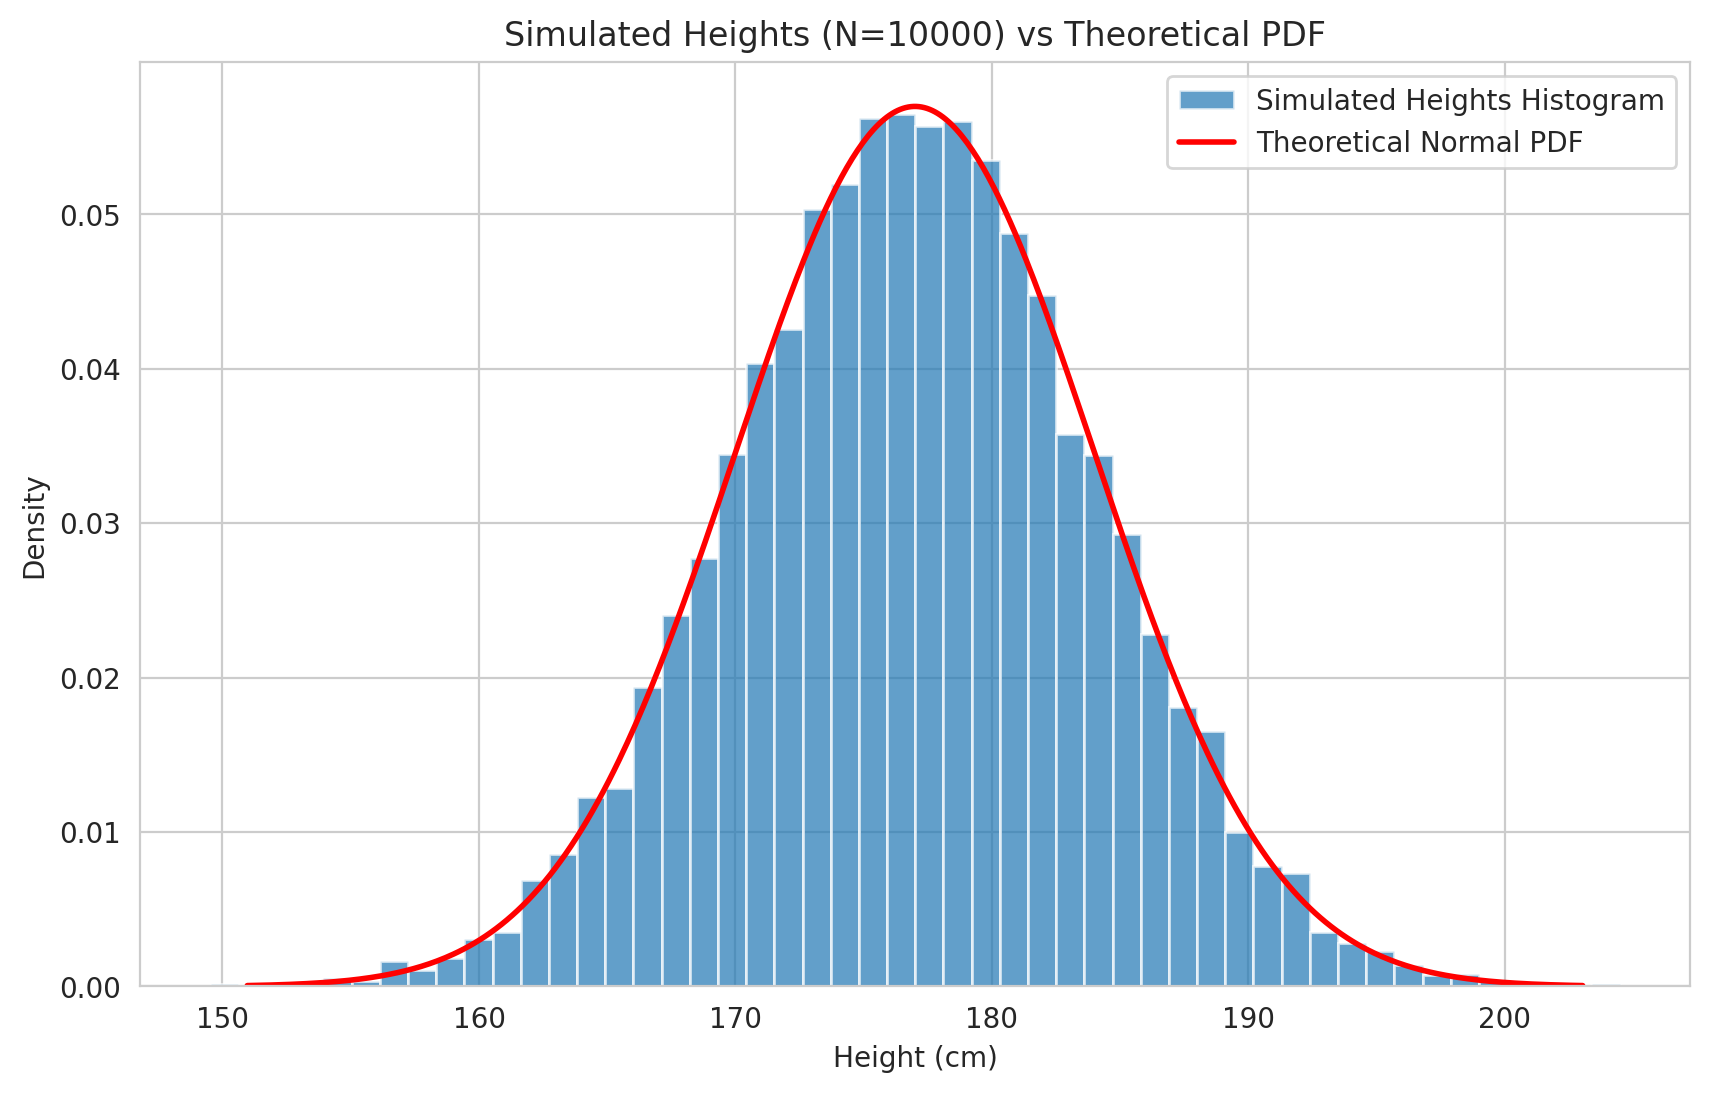

In [7]:
# Generate 10,000 random height samples
num_samples = 10000
# Set random_state for reproducibility - ensures we get the same 'random' samples each time
simulated_heights = height_dist.rvs(size=num_samples, random_state=42)

# Calculate empirical (sample) mean and std dev
empirical_mean = np.mean(simulated_heights)
empirical_std = np.std(simulated_heights) # Use np.std for population std dev estimate based on sample

print(f"Theoretical Mean: {mu_height:.2f}, Empirical Mean (from {num_samples} samples): {empirical_mean:.2f}")
print(f"Theoretical Std Dev: {sigma_height:.2f}, Empirical Std Dev (from {num_samples} samples): {empirical_std:.2f}")

# Plot histogram of simulated data vs theoretical PDF
plt.figure()
# Use density=True to normalize the histogram so its area sums to 1, making it comparable to the PDF
plt.hist(simulated_heights, bins=50, density=True, alpha=0.7, label='Simulated Heights Histogram')

# Overlay the theoretical PDF for comparison
plt.plot(x_height, pdf_values, 'r-', lw=2, label='Theoretical Normal PDF')

plt.title(f'Simulated Heights (N={num_samples}) vs Theoretical PDF')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

As the plot shows, the histogram of the randomly generated samples closely follows the shape of the theoretical Probability Density Function. Furthermore, the calculated sample mean and standard deviation are very close to the theoretical parameters ($\mu=177$, $\sigma=7$) of the distribution we sampled from.

According to the Law of Large Numbers (Chapter 13), as the number of samples (`num_samples`) increases, the empirical histogram will better approximate the true PDF, and the sample statistics (like mean and standard deviation) will converge to the true parameters of the distribution.

This hands-on section demonstrated how to work with the core concepts of continuous random variables – PDFs, CDFs, expectations, percentiles – using `scipy.stats`. We also saw how numerical integration can be used for calculations and how simulation allows us to generate data that follows a specific distribution, enabling comparison between empirical results and theoretical models.

In the next chapter, we will delve into specific, commonly encountered continuous distributions like the Uniform, Exponential, and the Normal distribution in more detail, exploring their properties and applications.